#ワークショップ
- pythonでグラフを表示してみよう
- 統計データを読み込んでグラフを作ってみよう

##グラフを表示してみよう

pythonでグラフを表示してみましょう．
下の例は，一週間の勉強時間を表すデータです．

| Mon. | Tue. | Wed. | Thu. | Fri. |
|---|---|---|---|---|
|5 h | 8 h | 6 h | 9 h | 4 h |

これを参考に，横軸に曜日，縦軸に勉強時間にした折れ線グラフを作成した例がこちらです．


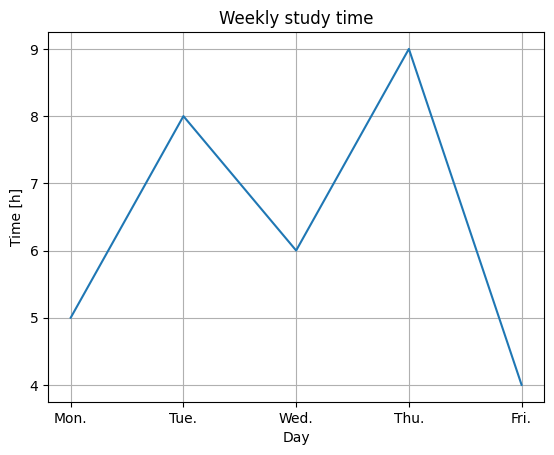

In [4]:
# pythonでグラフを書くための道具を読み込む
import matplotlib.pyplot as plt

# 曜日（x軸）を入力する
x = ['Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.']

# 勉強時間（y軸）を入力する
y = [5, 8, 6, 9, 4]

#################################

# 折れ線グラフを作成する
plt.plot(x, y)

#################################

# グラフの名前をつける
plt.title('Weekly study time')
# x軸の名前をつける
plt.xlabel('Day')
# y軸の名前をつける
plt.ylabel('Time [h]')
# グリッド線（罫線）を引く
plt.grid(True)
# グラフを表示する
plt.show()

それでは，こちらのデータを棒グラフに変えてみましょう．

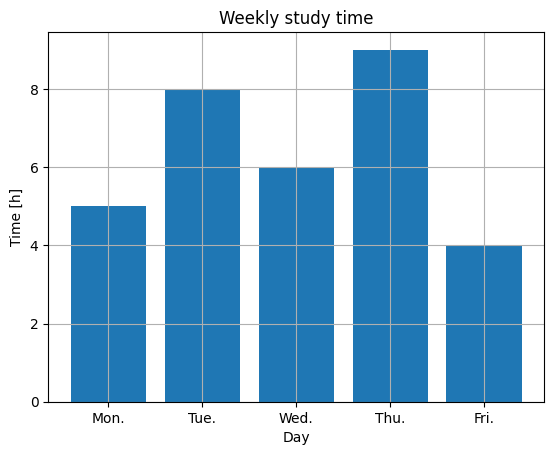

In [6]:
# pythonでグラフを書くための道具を読み込む
import matplotlib.pyplot as plt

# 曜日（x軸）を入力する
x = ['Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.']

# 勉強時間（y軸）を入力する
y = [5, 8, 6, 9, 4]

#################################

# 棒グラフを作成する
plt.bar(x, y)

#################################

# グラフの名前をつける
plt.title('Weekly study time')
# x軸の名前をつける
plt.xlabel('Day')
# y軸の名前をつける
plt.ylabel('Time [h]')
# グリッド線（罫線）を引く
plt.grid(True)
# グラフを表示する
plt.show()

先ほどの折れ線グラフの
```
plt.plot(x, y)
```
を
```
plt.bar(x, y)
```
に変えただけで，棒グラフに変わりました．

pythonでは，データの推移を知りたければ折れ線グラフを，データのスケールを知りたければ棒グラフを，というように目的に応じてグラフの種類を簡単に切り替えられます．

それでは，一週間の中でどの曜日に多く勉強したか調べたいとします．割合を表すのに適したグラフといえば，円グラフが挙げられます．

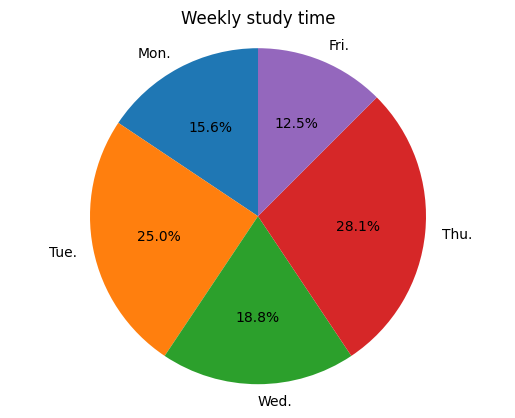

In [10]:
# pythonでグラフを書くための道具を読み込む
import matplotlib.pyplot as plt

# 曜日（ラベル）を入力する
x = ['Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.']

# 勉強時間（値）を入力する
y = [5, 8, 6, 9, 4]

#################################
# 円グラフを作成する
plt.pie(y, labels=x, autopct='%1.1f%%', startangle=90)

# 円を完璧な丸にするため
plt.axis('equal')
#################################

# グラフの名前をつける
plt.title('Weekly study time')

# グラフを表示する
plt.show()

先ほどとほとんど同じ要領で円グラフも作成できました．

もし，金曜日の勉強時間が4時間から8時間に変更したいときは，
```
sizes = [5, 8, 6, 9, 4]
```
を
```
sizes = [5, 8, 6, 9, 8]
```
に変更するだけで書き換えられます．曜日に関しても同じ要領で実装できます．



## **課題1**

こちらは，月曜日から金曜日までの睡眠時間をあらわす表です．

| Mon. | Tue. | Wed. | Thu. | Fri. |
|---|---|---|---|---|
|7.5 h | 8 h | 6 h | 5 h | 5.5 h |

先ほどのプログラムを参考に，睡眠時間に関するグラフを作成してみましょう．

## **データを読み込んでグラフを作ってみよう**

実際の統計データをグラフにしてみましょう．今回はGapminder Foundationが提供する各国の社会・経済・健康に関する統計データを扱います．こちらの統計データでは，

| 項目名 | 説明 |
| --- | --- |
| `country`   | 国名 |
| `continent` | 所属大陸 |
| `year`      | 年（1952～2007、5年おき） |
| `lifeExp`   | 平均寿命 |
| `pop`       | 総人口 |
| `gdpPercap` | 1人当たりGDP（ドル）|

が公開されています．それでは試しに，2007年の人口データを読み込んで，上位10位まで棒グラフで表示してみましょう．


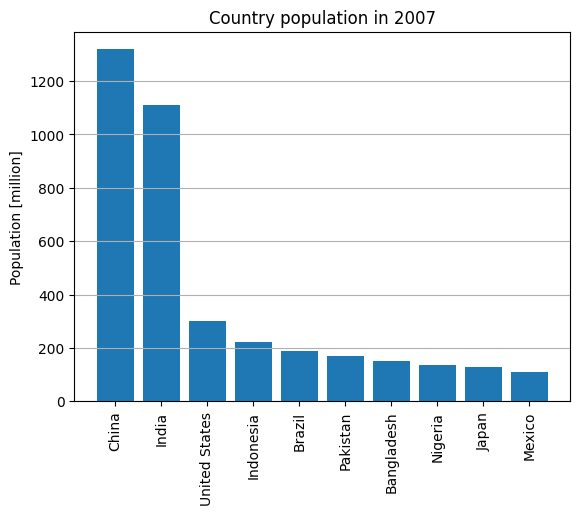

In [1]:
# データを読み込むための道具を読み込む
import pandas as pd
# pythonでグラフを書くための道具を読み込む
import matplotlib.pyplot as plt

# Gapminderの統計データを読み込む
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv')


#############################################

# 2007年の人口データで 上位10番目までのデータだけ取り出す
df_year = df[df['year'] == 2007].sort_values(by='pop', ascending=False).head(10)

# 国名（x軸）を設定する
x = df_year['country']

# 人口（y軸）を設定する
y =  df_year['pop'] / 1e6

# 棒グラフを作成する
plt.bar(x,y)

#############################################


# グラフの名前を設定する
plt.title('Country population in 2007')

# y軸の名前を設定する
plt.ylabel('Population [million]')

# 90度回転させた状態でx軸を表記する
plt.xticks(rotation=90)

# 横方向に罫線を引く
plt.grid(axis='y')

# グラフを表示する
plt.show()


こちらの部分の仕組みを説明します．

```
df_year = df[df['year'] == 2007].sort_values(by='pop', ascending=False).head(10)
```

まず，```df['year']```では，項目名"year"に関するデータを取り出しています．
このとき，```df['year'] == 2007```で，2007年に取り出す範囲を限定しています．
これを```df['year'] == 2002```とすれば，2002年のデータを取り出せます．

つづいて，```sort_values(by='pop', ascending=False)```では，大きい順に国ごとのデータを取り出します．このとき，```.head(10)```で取り出す個数をしています．そのため，上位20か国の人口を表示したいときは，```sort_values(by='pop', ascending=False).head(20)```と変更します．

では今度は，日本の人口の推移をあらわす折れ線グラフを作成してみましょう．

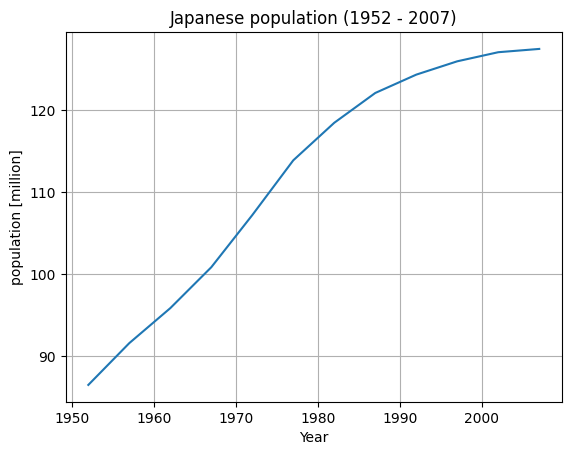

In [1]:
# データを読み込むための道具を読み込む
import pandas as pd
# pythonでグラフを書くための道具を読み込む
import matplotlib.pyplot as plt

# Gapminderの統計データを読み込む
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv')


#############################################

# 日本のデータだけを抽出
df_country = df[df['country'] == 'Japan']

# 年（x軸）を設定する
x = df_country['year']

# 人口（y軸）を設定する
y = df_country['pop'] / 1e6

# 折れ線グラフを描く
plt.plot(x, y)

#############################################


# グラフの名前を設定する
plt.title('Japanese population (1952 - 2007)')

# x軸の名前を設定する
plt.xlabel('Year')

# y軸の名前を設定する
plt.ylabel('population [million]')

# グリッドを表示
plt.grid(True)

# グラフを表示
plt.show()


```df_country = df[df['country'] == 'Japan']```では，日本のデータだけ取り出します．もし，```df_country = df[df['country'] == 'Canada']```に変更すれば，カナダの人口データに切り替えられます．

## **課題2**

**カナダ**の人口推移を表す**棒グラフ**を作成してみましょう．